In [53]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline


In [54]:
X = 6 * np.random.rand(200,1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200,1) #<== this part is random noise

#Original equation
# y = 0.8x^2 + 0.9x + 2

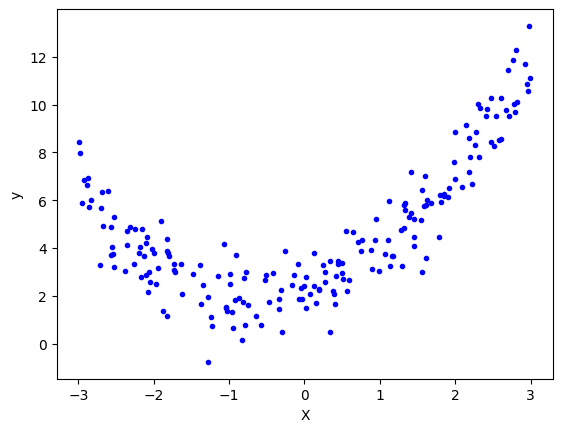

In [55]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [56]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [57]:
# Apply the Linear Regression
lr = LinearRegression()

In [58]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
y_pred = lr.predict(X_test)

In [60]:
r2_score(y_test,y_pred)

0.3395515169433577

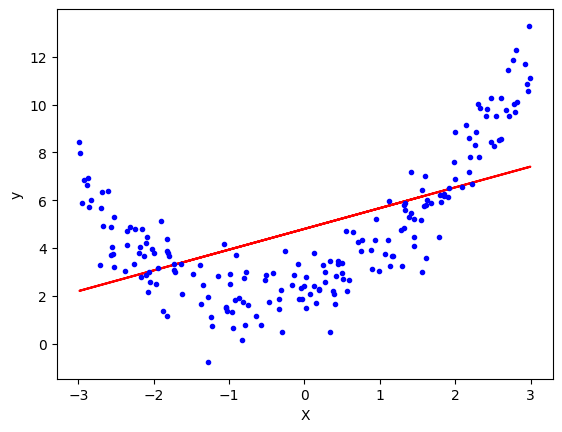

In [61]:
plt.plot(X_train,lr.predict(X_train),color = 'r')
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## So here the predictive Linear Line does not fits to this non-linear data

## Applying Polynomial Linear Regression

In [62]:
# degree = 2
poly = PolynomialFeatures(degree = 2, include_bias = True) #include_bias = False <-- this term basically removes the x^0 (1) from column
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [63]:
print(X_train[0])
print(X_train_trans[0])

[-1.72571391]
[ 1.         -1.72571391  2.97808851]


In [64]:
print(X_test[0])
print(X_test_trans[0])

[2.18686194]
[1.         2.18686194 4.78236514]


## Now we are including the bias term

In [65]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [66]:
y_pred = lr.predict(X_test_trans)
r2_score(y_test,y_pred)

0.89213424957682

In [67]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.91115225 0.78418918]]
[2.22483061]


In [68]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

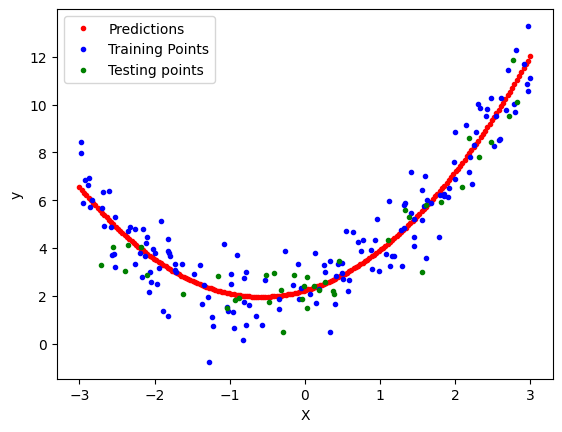

In [69]:
plt.plot(X_new, y_new, "r.", linewidth = 2, label = "Predictions")
plt.plot(X_train, y_train, 'b.',label = "Training Points")
plt.plot(X_test,y_test, 'g.', label = 'Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [70]:
def polynomial_regression(degree):
  X_new = np.linspace(-3,3,100).reshape(100,1)
  X_new_poly = poly.transform(X_new)

  polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()
  polynomial_regression = Pipeline([
    ('poly_features',polybig_features),
    ('std_scaler',std_scaler),
    ('lin_reg',lin_reg)
  ])
  polynomial_regression.fit(X,y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new,y_newbig,'r',label = 'Degree' + str(degree),linewidth = 2)

  plt.plot(X_train,y_train,'b.',linewidth = 3)
  plt.plot(X_test,y_test,'g.',linewidth = 3)
  plt.legend(loc = 'upper left')
  plt.xlabel('X')
  plt.ylabel('y')
  plt.axis([-3,3,0,10])
  plt.show()

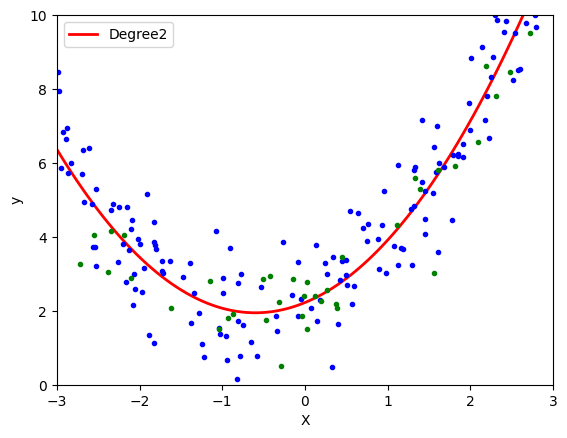

In [71]:
polynomial_regression(2)


### For nD columns

In [72]:
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x **2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y + 2 + np.random.rand(100, 1)

# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [73]:
!pip install plotly

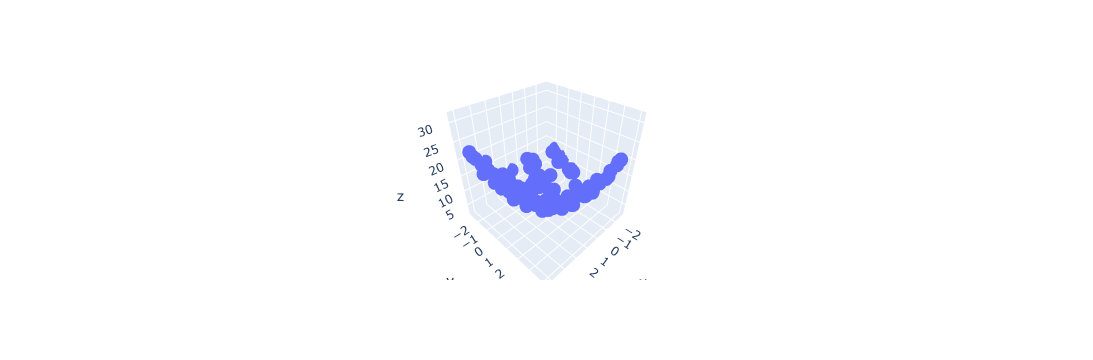

In [74]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x = x.ravel(), y = y.ravel(), z = z.ravel())
fig.show()

In [75]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

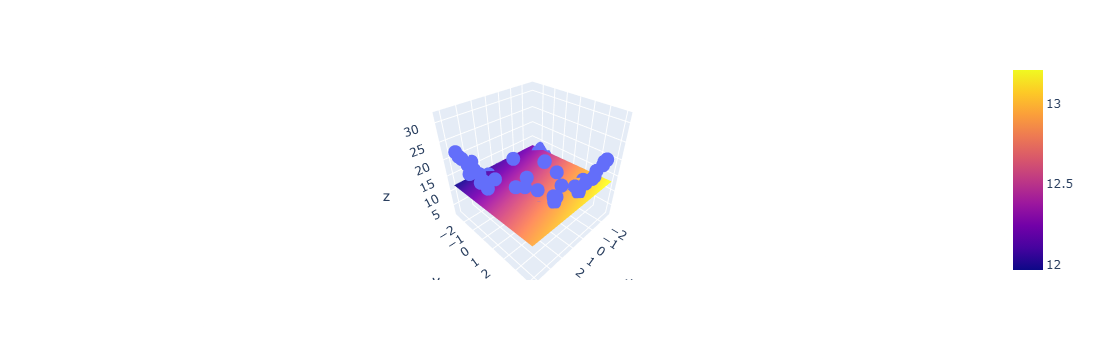

In [76]:
import plotly.graph_objects as go

fig = px.scatter_3d(df, x = x.ravel(),y = y.ravel(), z= z.ravel())
fig.add_trace(go.Surface(x = x_input,y = y_input,z = z_final))

fig.show()

In [77]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [100]:
poly = PolynomialFeatures(degree = 10)
X_multi_trans = poly.fit_transform(X_multi)

In [101]:
# print("Input: ",poly.n_input_features)
print("Output: ",poly.n_output_features_)
print("Powers\n ",poly.powers_)

Output:  66
Powers
  [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]]


In [102]:
X_multi.shape

(100, 2)

In [103]:
lr.fit(X_multi_trans,z)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [104]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

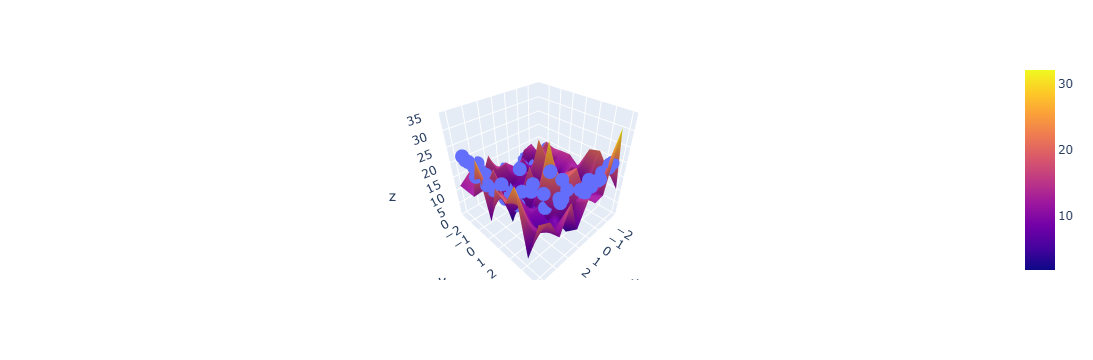

In [105]:
fig = px.scatter_3d(x = x.ravel(),y = y.ravel(), z = z.ravel())
fig.add_trace(go.Surface(x = x_input, y= y_input, z= z_final))
fig.update_layout(scene = dict(zaxis = dict(range = [0,35])))
fig.show()